In [21]:
import numpy as np
import scipy.stats
import cvxpy
import matplotlib.pyplot as plt

In [2]:
?np.corrcoef

In [4]:
def get_sim(X):
    return np.abs(np.corrcoef(X.T))

def get_rel(X, y):
    return np.abs(np.corrcoef(X.T, y)[:-1, -1])

In [34]:
def generate_data(m, eps, seed):
    np.random.seed(seed)
    # генерируем y и x1 из стандартного нормального распределения
    y = np.random.randn(m) 
    x1 = np.random.randn(m)

    x2 = x1 + eps * y
    X = np.array([x1, x2]).T
    return X, y

In [36]:
def solve_qpfs(b, Q):
    a = cvxpy.Variable(Q.shape[1])

    problem = cvxpy.Problem(cvxpy.Maximize(b.T @ a - cvxpy.quad_form(a, Q)), [a >= 0])
    problem.solve(solver='ECOS')

    return a.value

In [48]:
m = 1000
eps = 0.001
num_attempts = 100

a_list = []
cnt = 0

for seed in range(num_attempts):
    X, y = generate_data(m, eps, seed)

    b = get_rel(X, y)
    Q = get_sim(X)

    a = solve_qpfs(b, Q)
    a_list.append(a)
    cnt += (a[0] > a[1])
    
    print("SOLUTION:", a, a[0] > a[1])

print(f'в {cnt} случаях из {num_attempts} коэффициент a_1 больше a_2')
    
# SOLUTION: [1.57577192e-02 2.01086007e-08]
# SOLUTION: [1.06763521e-07 1.14062121e-02]
# SOLUTION: [6.05254637e-03 1.22225507e-06]
# SOLUTION: [1.53284022e-08 1.74994604e-02]
# SOLUTION: [1.43859131e-06 6.10161028e-03]
# SOLUTION: [2.67123647e-08 1.50881554e-02]
# SOLUTION: [3.05848931e-04 1.16792601e-06]
# SOLUTION: [1.32540008e-02 2.88693035e-08] -> look! The better feature receives smaller, infinitesimal weights
# SOLUTION: [2.65498319e-07 1.87896446e-03]
# SOLUTION: [8.83238623e-03 8.84212063e-07] -> look! The better feature receives smaller, infinitesimal weights

# Question 1: Why a_2 < a_1 in these two cases? -> think
# Question 2: What can we say in general about the results of this QPFS optimization for the dataset?

SOLUTION: [1.57577192e-02 2.01086007e-08] True
SOLUTION: [1.06763329e-07 1.14062121e-02] False
SOLUTION: [6.05254637e-03 1.22225636e-06] True
SOLUTION: [1.53283336e-08 1.74994604e-02] False
SOLUTION: [1.43858608e-06 6.10161027e-03] False
SOLUTION: [2.67123431e-08 1.50881554e-02] False
SOLUTION: [3.05848928e-04 1.16792614e-06] True
SOLUTION: [1.32540009e-02 2.88695913e-08] True
SOLUTION: [2.65498559e-07 1.87896446e-03] False
SOLUTION: [8.83238623e-03 8.84211116e-07] True
SOLUTION: [8.79335401e-08 3.43368330e-02] False
SOLUTION: [3.19744857e-07 7.42595573e-03] False
SOLUTION: [9.76118022e-08 9.74351305e-04] False
SOLUTION: [1.09016144e-02 1.30657647e-07] True
SOLUTION: [2.26628246e-07 9.52547296e-03] False
SOLUTION: [1.01562831e-02 1.88157659e-07] True
SOLUTION: [3.46541497e-08 3.93454933e-02] False
SOLUTION: [1.86588365e-02 3.43667529e-08] True
SOLUTION: [3.23378759e-04 1.11321809e-06] True
SOLUTION: [2.81247760e-08 1.31504912e-02] False
SOLUTION: [1.89379059e-08 1.59640020e-02] False
S

In [52]:
a_values = np.array(a_list)

In [58]:
?plt.legend

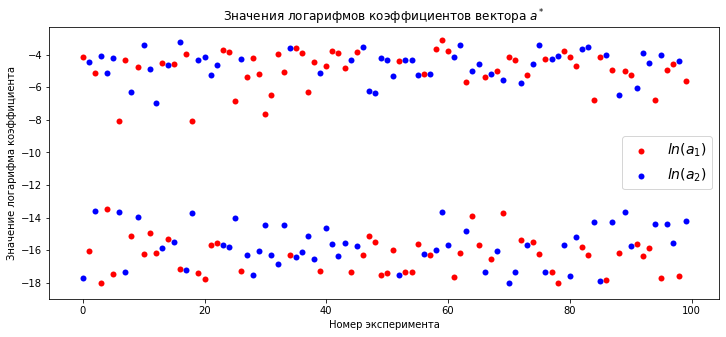

In [67]:
plt.figure(figsize=(12, 5))

plt.scatter(np.arange(num_attempts), np.log(a_values[:, 0]), color='red', 
            linewidths=0, label='$ln(a_1)$')
    
plt.scatter(np.arange(num_attempts), np.log(a_values[:, 1]), color='blue', 
            linewidths=0, label='$ln(a_2)$')
    
plt.title(r'Значения логарифмов коэффициентов вектора $a^*$')
plt.xlabel('Номер эксперимента')
plt.ylabel('Значение логарифма коэффициента')
plt.legend(loc='best', fontsize=14)
plt.show()